## Project Planning

### Goals

The goal of this project is to determine key factors in why a customer churns. By doing this, predictions can be made on whether a customer will churn or not, and action can be taken to reduce churn.

### Deliverables

1. A jupyter notebook that details the process and work that was done to reach the final conclusion.
1. A csv file that includes customer id, probability of churn, and whether we expect to customer to churn or not.
1. A slide that gives an overview of how the model works.
1. A python file that will be able to take in any new data and transform it so that it is able to be used with our model.

### Data Dictionary

- **gender**: is the customer male or female?
- **senior_citizen**: is the customer a senior citizen? 1 for yes, 0 for no.
- **partner**: does the customer have a partner?
- **dependents**: does the customer have dependents?
- **tenure**: Number of months the customer has had one of our services. 0 would mean they haven't been with us a full month yet.
- **phone_service**: does the customer have phone service?
- **multiple_lines**: does the customer have multiple lines? yes, no, or no phone service.
- **internet_service_type_id**: id of type of internet service.
- **online_security**: does the customer utilize the option of having a password.
- **online_backup**: does the customer utilize the option to backup their files?
- **device_protection**: does the customer utilize the option to protect their internet device (i.e. router)?
- **tech_support**: does the customer utilize the option to talk to tech support?
- **streaming_tv**: does the customer have the tv streaming service?
- **streaming_movies**: does the customer have the movie streaming service?
- **contract_type_id**: id of type of contract.
- **paperless_billing**: customer using paperless billing option?
- **payment_type_id**: id of type of payment.
- **monthly_charges**: Most recent monthly charge for that customer.
- **total_charges**: Most recent total charges for that customer.
- **churn**: Did the customer churn?
- **contract_type**: type of contract.
- **internet_service_type**: type of internet service.
- **payment_type**: type of payment.


In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import prepare
from scipy.stats import ttest_ind
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# import env

### Importing the data directly from my sql.

In [2]:
# dbc = env.get_connection('telco_churn')
# telco_full = pd.read_sql('SELECT * FROM customers c JOIN contract_types ct\
#                             ON c.contract_type_id = ct.contract_type_id JOIN internet_service_types it\
#                             ON c.internet_service_type_id = it.internet_service_type_id JOIN payment_types pt\
#                             ON c.payment_type_id = pt.payment_type_id', dbc)
# telco_full.head()


### Importing data from csv file

In [3]:
df = pd.read_csv('telco_full_data.csv')

In [4]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,payment_type_id,monthly_charges,total_charges,churn,contract_type_id.1,contract_type,internet_service_type_id.1,internet_service_type,payment_type_id.1,payment_type
0,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,2,59.9,542.4,No,1,Month-to-month,1,DSL,2,Mailed check
1,0013-MHZWF,Female,0,No,Yes,9,Yes,No,1,No,...,4,69.4,571.45,No,1,Month-to-month,1,DSL,4,Credit card (automatic)
2,0015-UOCOJ,Female,1,No,No,7,Yes,No,1,Yes,...,1,48.2,340.35,No,1,Month-to-month,1,DSL,1,Electronic check
3,0023-HGHWL,Male,1,No,No,1,No,No phone service,1,No,...,1,25.1,25.1,Yes,1,Month-to-month,1,DSL,1,Electronic check
4,0032-PGELS,Female,0,Yes,Yes,1,No,No phone service,1,Yes,...,3,30.5,30.5,Yes,1,Month-to-month,1,DSL,3,Bank transfer (automatic)


In [5]:
df.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract_type_id',
       'paperless_billing', 'payment_type_id', 'monthly_charges',
       'total_charges', 'churn', 'contract_type_id.1', 'contract_type',
       'internet_service_type_id.1', 'internet_service_type',
       'payment_type_id.1', 'payment_type'],
      dtype='object')

### Checking that duplicate columns are the same. (they are)

In [6]:
df.loc[df['payment_type_id'] != df['payment_type_id.1']]
df.loc[df['contract_type_id'] != df['contract_type_id.1']]
df.loc[df['internet_service_type_id'] != df['internet_service_type_id.1']]

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,payment_type_id,monthly_charges,total_charges,churn,contract_type_id.1,contract_type,internet_service_type_id.1,internet_service_type,payment_type_id.1,payment_type


### Dropping duplicate columns

In [7]:
df.drop(['payment_type_id.1', 'contract_type_id.1', 'internet_service_type_id.1'], inplace=True, axis=1)

In [8]:
df.sample(5)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
1736,9033-EOXWV,Female,0,No,No,12,Yes,Yes,1,No,...,Yes,2,No,2,74.05,872.65,Yes,One year,DSL,Mailed check
4260,8631-WUXGY,Female,0,No,Yes,46,Yes,No,2,No,...,Yes,1,Yes,1,99.80,4391.25,No,Month-to-month,Fiber optic,Electronic check
4372,9221-OTIVJ,Female,1,No,No,14,Yes,Yes,2,No,...,Yes,1,Yes,1,104.85,1531.4,Yes,Month-to-month,Fiber optic,Electronic check
1249,0484-FFVBJ,Male,0,No,No,32,Yes,No,1,No,...,Yes,2,Yes,3,64.85,2010.95,No,One year,DSL,Bank transfer (automatic)
6807,6323-AYBRX,Male,0,No,No,59,Yes,No,3,No internet service,...,No internet service,3,No,2,19.35,1099.6,Yes,Two year,None,Mailed check


In [9]:
df.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract_type_id',
       'paperless_billing', 'payment_type_id', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type'],
      dtype='object')

In [10]:
df.device_protection.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [11]:
df.paperless_billing.unique()

array(['No', 'Yes'], dtype=object)

## Hypothesis/General Ideas

- I believe that customers with multiple lines will have a decent effect on whether a customer churns or not. A customer with multiple lines might be less inclined to churn due to having to move all the lines over. Likewise, those with streaming services will be less likely to churn. Basically, the more services a customer has the less likely to churn.
- Monthly charges will also play a role. The more a customer pays, the more likely to churn.
- It might be a good idea to make a new feature that shows how many services a customer has.
- Making a family plan variable might be helpful. This would be a 0 or 1, and be determined by looking at the partner, dependents, and multiple lines.
- If online backup tells whether a customer uses our service to backup their data, this can be a useful variable in determining churn.
- If tech support is an option, I would think that customers who have that option available are less likely to churn

In [12]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,Yes,1,No,2,59.9,542.4,No,Month-to-month,DSL,Mailed check
1,0013-MHZWF,Female,0,No,Yes,9,Yes,No,1,No,...,Yes,1,Yes,4,69.4,571.45,No,Month-to-month,DSL,Credit card (automatic)
2,0015-UOCOJ,Female,1,No,No,7,Yes,No,1,Yes,...,No,1,Yes,1,48.2,340.35,No,Month-to-month,DSL,Electronic check
3,0023-HGHWL,Male,1,No,No,1,No,No phone service,1,No,...,No,1,Yes,1,25.1,25.1,Yes,Month-to-month,DSL,Electronic check
4,0032-PGELS,Female,0,Yes,Yes,1,No,No phone service,1,Yes,...,No,1,No,3,30.5,30.5,Yes,Month-to-month,DSL,Bank transfer (automatic)


#### Creating the `family_plan` variable

This variable can be either a 0 or 1. 1 means that the customer is likely part of a family plan, since they have a partner, have dependents, and have mulitple lines.

In [13]:
df['family_plan'] = (df.partner == 'Yes') & (df.dependents == 'Yes') & (df.multiple_lines == 'Yes')

In [14]:
df.loc[df.family_plan == True, 'family_plan'] = 1

In [15]:
df.loc[df.family_plan == False, 'family_plan'] = 0

In [16]:
df.family_plan.value_counts()

0    6295
1     748
Name: family_plan, dtype: int64

#### Exploration

What is the overall churn rate?

In [17]:
churn_le = LabelEncoder()
churn_le.fit(df['churn'])
df['churn_encoded'] = churn_le.transform(df['churn'])

In [18]:
overall_churn = df.churn_encoded.mean()
overall_churn

0.2653698707936959

### One way to discover drivers of churn is to find groups within the dataset that have significantly higher or lower rates of churn.

#### Encoding data

In [19]:
df_encoded = prepare.prep_telco(df)

In [20]:
df_encoded.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract_type_id',
       'paperless_billing', 'payment_type_id', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type', 'family_plan', 'churn_encoded', 'tenure_year',
       'in_tenure_year', 'household', 'phone_id', 'streaming_services',
       'online_security_backup', 'payment_type_encode',
       'internet_service_type_encode', 'contract_type_encode', 'churn_encode',
       'paperless_billing_encode', 'streaming_movies_encode',
       'streaming_tv_encode', 'tech_support_encode',
       'device_protection_encode', 'online_backup_encode',
       'online_security_encode', 'multiple_lines_encode',
       'phone_service_encode', 'dependents_encode', 

#### Looking at 'security options' to check if there is a difference.

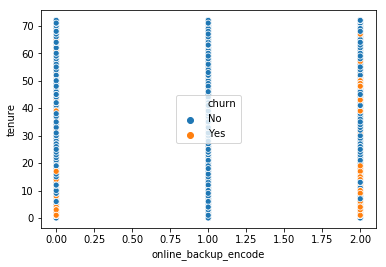

In [21]:
sns.scatterplot(data=df_encoded, x='online_backup_encode', y='tenure', hue='churn')

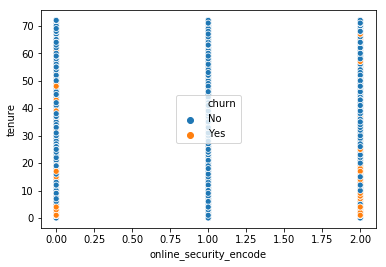

In [22]:
sns.scatterplot(data=df_encoded, x='online_security_encode', y='tenure', hue='churn')

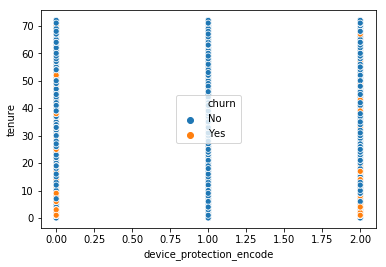

In [23]:
sns.scatterplot(data=df_encoded, x='device_protection_encode', y='tenure', hue='churn')

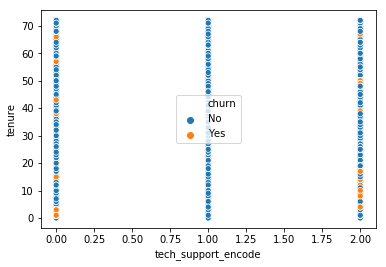

In [24]:
sns.scatterplot(data=df_encoded, x='tech_support_encode', y='tenure', hue='churn')

In [25]:
df_encoded[['online_backup_encode', 'online_backup']].sample(10)

,online_backup_encode,online_backup
91,0,No
2539,0,No
3913,0,No
3559,0,No
4568,2,Yes
147,0,No
5197,2,Yes
2005,2,Yes
4050,0,No
123,2,Yes


#### Looking at this tells me that those customers without internet service seem to be churning less.

In [26]:
df_encoded.internet_service_type.unique()

array(['DSL', 'Fiber optic', 'None'], dtype=object)

In [27]:
df_encoded.groupby('internet_service_type')['churn_encoded'].mean()

internet_service_type
DSL            0.189591
Fiber optic    0.418928
None           0.074050
Name: churn_encoded, dtype: float64

#### The churn rate of the different groups seem to support this. Those customers without internet have a 7% churn rate, those with DSL have a 19% churn rate, but those with fiber churn at a rate of 42%.

Why are those with fiber churning more? Initial thought is they are paying substantially more for fiber. 

But first, lets look at security options.

##### Tech support

In [28]:
df_encoded.groupby('internet_service_type')['tech_support_encode'].mean()

internet_service_type
DSL            0.973152
Fiber optic    0.559432
None           1.000000
Name: tech_support_encode, dtype: float64

In [29]:
df_encoded.groupby(['internet_service_type', 'tech_support'])['internet_service_type'].count()



internet_service_type  tech_support       
DSL                    No                     1243
                       Yes                    1178
Fiber optic            No                     2230
                       Yes                     866
None                   No internet service    1526
Name: internet_service_type, dtype: int64

##### While DSL users have a pretty even split of whether they use tech support or not, majority of fiber users do not use tech support.
Can this be a factor in churn? Are fiber users with tech support less likely to churn than those without?

In [30]:
fiber_no_tech = df_encoded.loc[(df.internet_service_type_id == 2) & (df_encoded.tech_support_encode == 0)]
fiber_with_tech = df_encoded.loc[(df.internet_service_type_id == 2) & (df_encoded.tech_support_encode == 2)]

print(fiber_no_tech.churn_encoded.mean())
print(fiber_with_tech.churn_encoded.mean())

ttest_ind(fiber_no_tech.churn_encoded, fiber_with_tech.churn_encoded)

0.49372197309417043
0.22632794457274827


Ttest_indResult(statistic=13.950307133580548, pvalue=6.0943037385951464e-43)

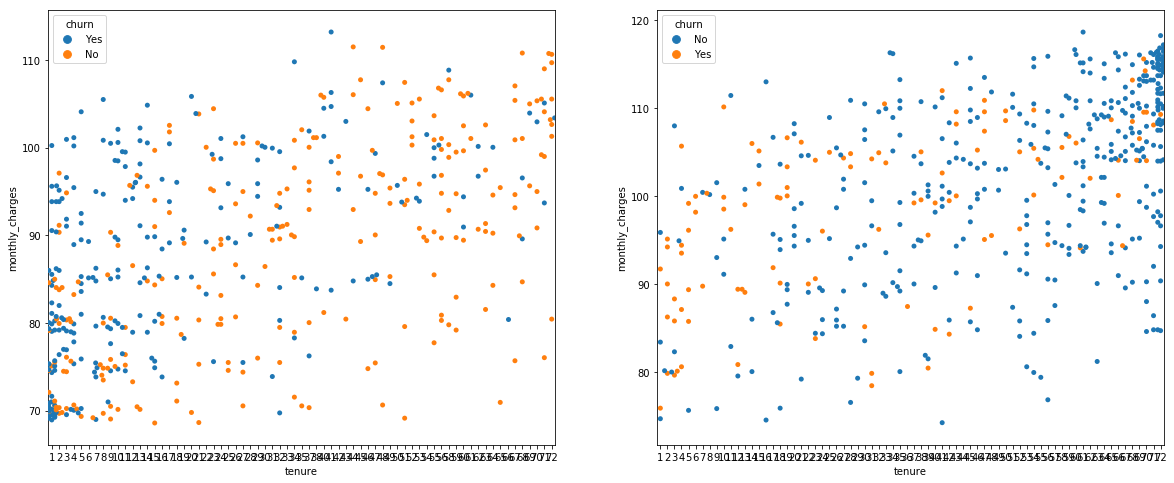

In [31]:
plt.figure(figsize=(20,8))
plt.subplot(121)
sns.swarmplot(data=fiber_no_tech.sample(500), x='tenure', y='monthly_charges', hue='churn')
plt.subplot(122)
sns.swarmplot(data=fiber_with_tech.sample(500), x='tenure', y='monthly_charges', hue='churn')

##### There is a significant difference in churn rate between fiber users with tech support and fiber users without tech support.
The churn rate for those with tech support is only 23%, actually below the overall churn rate. The churn rate for those without tech support is 49%, almost double the overall churn rate!

What does this say about tech support?
- tech support is an important factor when it comes to a user's decision to churn
- perhaps fiber has technical issues, and those that get it fixed stay, while those that don't leave
- why would some users not utilize tech support? have to pay for it?

A quick look at the average monthly charges shows that those with tech support might be paying more for it. To be sure the other variables need to be accounted for.

In [32]:
print('Average monthly charge for fiber users without tech support: ${:.2f}'
      .format(fiber_no_tech.monthly_charges.mean()))
print('Average monthly charge for fiber users with tech support: ${:.2f}'
      .format(fiber_with_tech.monthly_charges.mean()))

Average monthly charge for fiber users without tech support: $87.74
Average monthly charge for fiber users with tech support: $101.18


In [33]:
print('Average tenure for fiber users without tech support: {:.0f} months'
      .format(fiber_no_tech.tenure.mean()))
print('Average tenure for fiber users with tech support: {:.0f} months'
      .format(fiber_with_tech.tenure.mean()))


Average tenure for fiber users without tech support: 27 months
Average tenure for fiber users with tech support: 48 months


##### An overwhelming amount of fiber users without tech support are on a month to month plan. They are the group with the highest churn rate.
This freedom can help explain why these users are leaving. The users have trouble with fiber and instead of fixing it, they go to someone else.

This also shows that month to month contracts in general churn the most. This isn't surprising, but doesn't explain why are they churning. They aren't churning just because they can. As stated earlier, they are perhaps churning due to lack of tech support. Other variables can also cause people on month to month to churn.

In [34]:
df_encoded.groupby(['internet_service_type', 'tech_support', 'contract_type'])['contract_type'].count()

internet_service_type  tech_support         contract_type 
DSL                    No                   Month-to-month     884
                                            One year           244
                                            Two year           115
                       Yes                  Month-to-month     339
                                            One year           326
                                            Two year           513
Fiber optic            No                   Month-to-month    1796
                                            One year           313
                                            Two year           121
                       Yes                  Month-to-month     332
                                            One year           226
                                            Two year           308
None                   No internet service  Month-to-month     524
                                            One year           364
   

In [35]:
df_encoded.groupby(['internet_service_type', 'tech_support', 'contract_type'])['churn_encoded'].mean()

internet_service_type  tech_support         contract_type 
DSL                    No                   Month-to-month    0.358597
                                            One year          0.098361
                                            Two year          0.034783
                       Yes                  Month-to-month    0.227139
                                            One year          0.088957
                                            Two year          0.015595
Fiber optic            No                   Month-to-month    0.575167
                                            One year          0.185304
                                            Two year          0.082645
                       Yes                  Month-to-month    0.388554
                                            One year          0.203540
                                            Two year          0.068182
None                   No internet service  Month-to-month    0.188931
                  

##### A break to look at the churn rates of the different 'security' variables

In [36]:
df_encoded.groupby(['internet_service_type', 'tech_support'])['churn_encoded'].mean()

internet_service_type  tech_support       
DSL                    No                     0.277554
                       Yes                    0.096774
Fiber optic            No                     0.493722
                       Yes                    0.226328
None                   No internet service    0.074050
Name: churn_encoded, dtype: float64

In [37]:
df_encoded.groupby(['internet_service_type', 'online_backup'])['churn_encoded'].mean()

internet_service_type  online_backup      
DSL                    No                     0.256929
                       Yes                    0.106814
Fiber optic            No                     0.507701
                       Yes                    0.303053
None                   No internet service    0.074050
Name: churn_encoded, dtype: float64

In [38]:
df_encoded.groupby(['internet_service_type', 'online_security'])['churn_encoded'].mean()

internet_service_type  online_security    
DSL                    No                     0.279613
                       Yes                    0.094915
Fiber optic            No                     0.493576
                       Yes                    0.218117
None                   No internet service    0.074050
Name: churn_encoded, dtype: float64

In [39]:
df_encoded.groupby(['internet_service_type', 'device_protection'])['churn_encoded'].mean()

internet_service_type  device_protection  
DSL                    No                     0.252212
                       Yes                    0.109859
Fiber optic            No                     0.499712
                       Yes                    0.315402
None                   No internet service    0.074050
Name: churn_encoded, dtype: float64

In [40]:
df_encoded[['contract_type_id', 'contract_type']].sample(10)

,contract_type_id,contract_type
1584,2,One year
4458,1,Month-to-month
1903,3,Two year
1696,2,One year
1439,2,One year
3998,1,Month-to-month
4948,2,One year
6718,3,Two year
1813,3,Two year
3794,1,Month-to-month


## 55% of customers are on month to month contracts.

In [41]:
df_encoded.loc[df.contract_type_id == 1].shape[0]/len(df_encoded)

0.5501916796819537

In [42]:
df_encoded.loc[df.contract_type_id == 1]['churn_encoded'].mean()

0.4270967741935484

We can't just get rid of month to month contracts though. This will cause the company to be less competitive, plus those MtM customers might only be with us because we offer MtM. If we take it away, there is no guarantee that they will switch to a contract.

## Checking senior citizen rate.

##### 16% of customers are senior citizens.

In [43]:
df_encoded.senior_citizen.mean()

0.1621468124378816

In [44]:
df_encoded.loc[df.senior_citizen == 1]['churn_encoded'].mean()

0.4168126094570928

In [45]:
df_encoded.loc[df.senior_citizen == 0]['churn_encoded'].mean()

0.23606168446026096

## 42% of senior citizens churn
while only 24% of those who aren't senior citizens do the same.

This doesn't mean we should ban senior citizens. Instead, why are senior citizens churning at such a high rate?

First, what does it mean for a senior citizen to churn? Hopefully they don't just die, but that's a possibility. The preferable way to think is that they are switching to another company for some reason, but what are those reasons?
- bad service?
- paying more?

Below we look at the group that has fiber without tech support and look at the percentage that are senior citizens.

In [46]:
df_encoded.loc[df_encoded.contract_type_id == 1].groupby('senior_citizen')['senior_citizen'].count()

senior_citizen
0    3068
1     807
Name: senior_citizen, dtype: int64

In [47]:
807/(3068+807)*100

20.825806451612902

21% of customers on MtM are senior citizens.

#### 27% of fiber users are senior citizens.

In [48]:
df_encoded.groupby(['internet_service_type'])['senior_citizen'].mean()

internet_service_type
DSL            0.106981
Fiber optic    0.268411
None           0.034076
Name: senior_citizen, dtype: float64

#### Almost  30% of fiber users without tech support are senior citizens.

In [49]:
df_encoded.groupby(['internet_service_type', 'tech_support'])['senior_citizen'].mean()

internet_service_type  tech_support       
DSL                    No                     0.136766
                       Yes                    0.075552
Fiber optic            No                     0.295964
                       Yes                    0.197460
None                   No internet service    0.034076
Name: senior_citizen, dtype: float64

#### 32% of fiber/no tech support/ month to month users are senior citizens.

In [50]:
df_encoded.groupby(['internet_service_type', 'tech_support', 'contract_type'])['senior_citizen'].mean().sort_values(ascending=False)

internet_service_type  tech_support         contract_type 
Fiber optic            No                   Month-to-month    0.316258
                                            One year          0.236422
                       Yes                  One year          0.221239
                                            Month-to-month    0.204819
                                            Two year          0.172078
                       No                   Two year          0.148760
DSL                    No                   Month-to-month    0.147059
                                            Two year          0.130435
                                            One year          0.102459
                       Yes                  Month-to-month    0.085546
                                            One year          0.076687
                                            Two year          0.068226
None                   No internet service  One year          0.043956
                  

### Churn rate is high, almost 60%, for senior citizens on fiber without tech and on MtM.

In [51]:
df_encoded.groupby(['internet_service_type', 
                    'tech_support', 
                    'contract_type',
                    'senior_citizen'])['churn_encoded'].mean().sort_values(ascending=False)



internet_service_type  tech_support         contract_type   senior_citizen
Fiber optic            No                   Month-to-month  1                 0.598592
                                                            0                 0.564332
DSL                    No                   Month-to-month  1                 0.484615
None                   No internet service  Month-to-month  1                 0.416667
Fiber optic            Yes                  Month-to-month  1                 0.411765
                                                            0                 0.382576
DSL                    No                   Month-to-month  0                 0.336870
                       Yes                  Month-to-month  0                 0.232258
Fiber optic            Yes                  One year        0                 0.204545
                                                            1                 0.200000
                       No                   One year   

### Do senior citizens pay more than non seniors?

In [52]:
seniors = df_encoded.loc[df.senior_citizen == 1]
non_seniors = df_encoded.loc[df.senior_citizen == 0]

In [53]:
seniors.loc[seniors.internet_service_type == 'Fiber optic']['monthly_charges'].mean()

91.1859205776173

In [54]:
non_seniors.loc[non_seniors.internet_service_type == 'Fiber optic']['monthly_charges'].mean()

91.6154083885209

##### Online Security

In [55]:
df_encoded.groupby('internet_service_type')['online_security_encode'].mean()

internet_service_type
DSL            0.974804
Fiber optic    0.541990
None           1.000000
Name: online_security_encode, dtype: float64

In [56]:
df_encoded.groupby(['internet_service_type', 'online_security'])['internet_service_type'].count()

internet_service_type  online_security    
DSL                    No                     1241
                       Yes                    1180
Fiber optic            No                     2257
                       Yes                     839
None                   No internet service    1526
Name: internet_service_type, dtype: int64

##### While DSL users have a pretty even split of whether they have online security or not, majority of fiber users do not have online security.
Can this be a factor in churn? Are fiber users with online security less likely to churn than those without?

In [57]:
fiber_no_security = df_encoded.loc[(df.internet_service_type_id == 2) & (df_encoded.online_security == 'No')]
fiber_with_security = df_encoded.loc[(df.internet_service_type_id == 2) & (df_encoded.online_security == 'Yes')]

print(fiber_no_security.churn_encoded.mean())
print(fiber_with_security.churn_encoded.mean())

ttest_ind(fiber_no_security.churn_encoded, fiber_with_security.churn_encoded)

0.4935755427558706
0.21811680572109654


Ttest_indResult(statistic=14.248827588212508, pvalue=1.1449724339614072e-44)

#### There is a significant difference in churn between fiber users with online security and those without.
The group with online security had a 22% churn rate, while those without had a 49% churn rate. This is pretty similar to the churn rates based on tech support.
What does this say about online security?
- online security is an important factor for customers

In [58]:
print('Average monthly charge for those without online security: ${:.2f}'.format(fiber_no_security.monthly_charges.mean()))
print('Average monthly charge for those with online security: ${:.2f}'.format(fiber_with_security.monthly_charges.mean()))


Average monthly charge for those without online security: $88.63
Average monthly charge for those with online security: $99.22


Once again, the numbers are similar to those seen comparing tech support.

In [59]:
print('Average tenure for fiber users without online security: {:.0f} months'
      .format(fiber_no_security.tenure.mean()))
print('Average tenure for fiber users with online security: {:.0f} months'
      .format(fiber_with_security.tenure.mean()))


Average tenure for fiber users without online security: 27 months
Average tenure for fiber users with online security: 48 months


I am starting to think that tech support and online security might be "packaged" together in some way.

In [60]:
df_encoded[['online_security_encode', 'tech_support_encode', 'device_protection_encode', 'online_backup_encode']].corr()

,online_security_encode,tech_support_encode,device_protection_encode,online_backup_encode
online_security_encode,1.000000,0.285028,0.175985,0.185126
tech_support_encode,0.285028,1.000000,0.240593,0.195748
device_protection_encode,0.175985,0.240593,1.000000,0.187757
online_backup_encode,0.185126,0.195748,0.187757,1.000000


There is some correlation but not very strong.

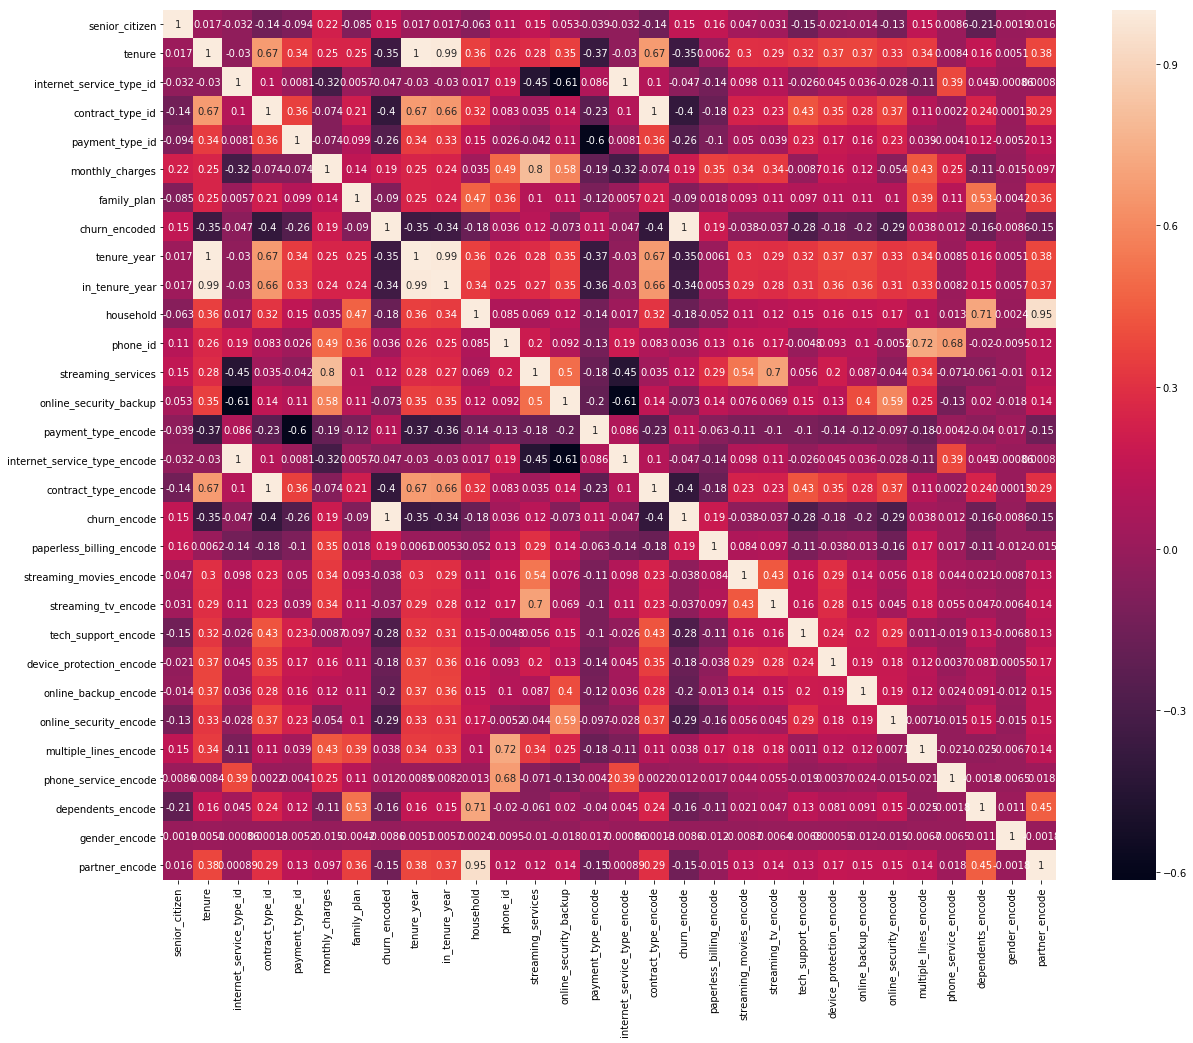

In [61]:
plt.figure(figsize=(20, 16))
sns.heatmap(df_encoded.corr(), annot=True)

#### Once again, month to month jumps out as being the largest group based on contracts within out fiber users without online security.

In [62]:
df_encoded.groupby(['internet_service_type', 'online_security', 'contract_type'])['contract_type'].count()

internet_service_type  online_security      contract_type 
DSL                    No                   Month-to-month     857
                                            One year           240
                                            Two year           144
                       Yes                  Month-to-month     366
                                            One year           330
                                            Two year           484
Fiber optic            No                   Month-to-month    1774
                                            One year           317
                                            Two year           166
                       Yes                  Month-to-month     354
                                            One year           222
                                            Two year           263
None                   No internet service  Month-to-month     524
                                            One year           364
   

##### Online Backup

In [63]:
df_encoded.groupby('internet_service_type')['online_backup_encode'].mean()

internet_service_type
DSL            0.897150
Fiber optic    0.867571
None           1.000000
Name: online_backup_encode, dtype: float64

In [64]:
df_encoded.groupby(['internet_service_type', 'online_backup'])['online_backup_encode'].count()

internet_service_type  online_backup      
DSL                    No                     1335
                       Yes                    1086
Fiber optic            No                     1753
                       Yes                    1343
None                   No internet service    1526
Name: online_backup_encode, dtype: int64

In [65]:
fiber_no_backup = df_encoded.loc[(df.internet_service_type_id == 2) & (df_encoded.online_backup == 'No')]
fiber_with_backup = df_encoded.loc[(df.internet_service_type_id == 2) & (df_encoded.online_backup == 'Yes')]

print(fiber_no_backup.churn_encoded.mean())
print(fiber_with_backup.churn_encoded.mean())

ttest_ind(fiber_no_backup.churn_encoded, fiber_with_backup.churn_encoded)

0.5077010838562465
0.30305286671630677


Ttest_indResult(statistic=11.683880626204676, pvalue=6.799474455449945e-31)

##### Device Protection

In [66]:
df_encoded.groupby('internet_service_type')['device_protection_encode'].mean()

internet_service_type
DSL            0.879802
Fiber optic    0.876615
None           1.000000
Name: device_protection_encode, dtype: float64

In [67]:
df_encoded.groupby(['internet_service_type', 'device_protection'])['device_protection'].count()

internet_service_type  device_protection  
DSL                    No                     1356
                       Yes                    1065
Fiber optic            No                     1739
                       Yes                    1357
None                   No internet service    1526
Name: device_protection, dtype: int64

In [68]:
fiber_no_protection = df_encoded.loc[(df.internet_service_type_id == 2) & (df_encoded.device_protection == 'No')]
fiber_with_protection = df_encoded.loc[(df.internet_service_type_id == 2) & (df_encoded.device_protection == 'Yes')]

print(fiber_no_protection.churn_encoded.mean())
print(fiber_with_protection.churn_encoded.mean())

ttest_ind(fiber_no_protection.churn_encoded, fiber_with_protection.churn_encoded)



0.4997124784358827
0.3154016212232867


Ttest_indResult(statistic=10.491964914685964, pvalue=2.4907995587524844e-25)

### All "security" variables seem to play a role on churn rate.

#### Looking at the family_plan variable and exploring the data related to it

In [69]:
df_encoded.groupby('family_plan')['churn_encoded'].mean()

family_plan
0    0.279110
1    0.149733
Name: churn_encoded, dtype: float64

In [70]:
family_plans = df[df_encoded.family_plan == 1]
all_not_family_plans = df[df_encoded.family_plan == 0]

ttest_ind(family_plans.churn_encoded, all_not_family_plans.churn_encoded)

Ttest_indResult(statistic=-7.606498493646839, pvalue=3.1825089609624446e-14)

##### Those customers we believe are on a family plan look to be churning less. Those not on a family plan have a 28% churn rate and those on one have a 15% churn rate.

Are there customers that can be on a family plan and are not? This would mean they have a partner and dependents but do not have multiple lines. If so, do they churn at a higher rate than those on a family plan?

In [71]:
part_n_dep = df_encoded.loc[(df.partner == 'Yes') 
               & (df.dependents == 'Yes') 
               & (df.multiple_lines == 'No')]

print(part_n_dep.churn_encoded.mean())

ttest_ind(part_n_dep.churn_encoded, family_plans.churn_encoded)

0.1430274135876043


Ttest_indResult(statistic=-0.3771937048874601, pvalue=0.7060801536851324)

##### At 14% churn rate, there is not a significant difference between the two groups.

What if we expand the criteria? Are there customers that have a partner **OR** dependents that do not have multiple lines? Do they churn at a higher rate?

In [72]:
part_or_dep = df_encoded.loc[((df.partner == 'Yes') 
               | (df.dependents == 'Yes')) 
               & (df.multiple_lines == 'No')]

print(part_or_dep.churn_encoded.mean())

ttest_ind(part_or_dep.churn_encoded, family_plans.churn_encoded)

0.1780653111521873


Ttest_indResult(statistic=1.7105790834237007, pvalue=0.0872897678681453)

##### 18% churn rate for those with partners or dependents but only one line. Not a significant difference. 
The overall difference between family plan customers and everyone else does not seem to be caused by "missed opportunities" for those who could potentially be on a family plan. This subset of customers is still churning less. Possibly paying less per line and thus feel like they are getting more value?

In [73]:
df_encoded.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract_type_id',
       'paperless_billing', 'payment_type_id', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type', 'family_plan', 'churn_encoded', 'tenure_year',
       'in_tenure_year', 'household', 'phone_id', 'streaming_services',
       'online_security_backup', 'payment_type_encode',
       'internet_service_type_encode', 'contract_type_encode', 'churn_encode',
       'paperless_billing_encode', 'streaming_movies_encode',
       'streaming_tv_encode', 'tech_support_encode',
       'device_protection_encode', 'online_backup_encode',
       'online_security_encode', 'multiple_lines_encode',
       'phone_service_encode', 'dependents_encode', 

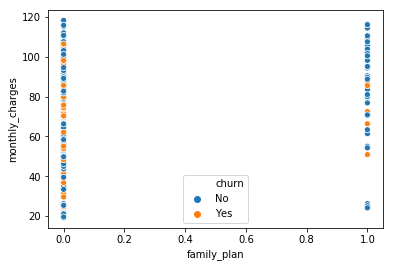

In [74]:
sns.scatterplot(data=df_encoded.sample(500), x='family_plan', y='monthly_charges', hue='churn')

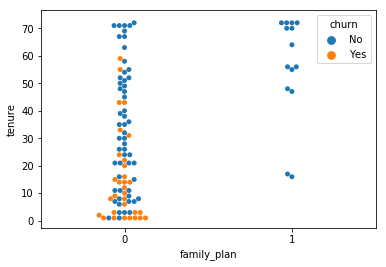

In [75]:
sns.swarmplot(data=df.sample(100), x='family_plan', y='tenure', hue='churn')

## Looking at average monthly charges for those who churn and those who don't

In [76]:
churned = df_encoded[df_encoded.churn_encoded == 1]
not_churned = df_encoded[df_encoded.churn_encoded == 0]

In [77]:
print(churned.monthly_charges.mean())
print(not_churned.monthly_charges.mean())

ttest_ind(churned.monthly_charges, not_churned.monthly_charges)

74.44133226324234
61.26512369539994


Ttest_indResult(statistic=16.536738015936308, pvalue=2.7066456068884154e-60)

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


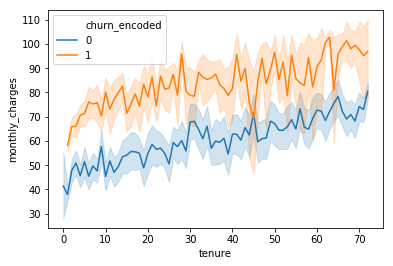

In [78]:
sns.lineplot(data=df_encoded, x='tenure', y='monthly_charges', hue='churn_encoded')

In [79]:
df_encoded.dtypes

customer_id                      object
gender                           object
senior_citizen                    int64
partner                          object
dependents                       object
tenure                            int64
phone_service                    object
multiple_lines                   object
internet_service_type_id          int64
online_security                  object
online_backup                    object
device_protection                object
tech_support                     object
streaming_tv                     object
streaming_movies                 object
contract_type_id                  int64
paperless_billing                object
payment_type_id                   int64
monthly_charges                 float64
total_charges                    object
churn                            object
contract_type                    object
internet_service_type            object
payment_type                     object
family_plan                       int64


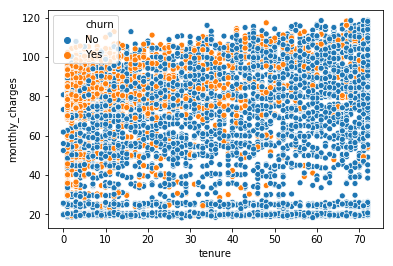

In [80]:
sns.scatterplot(data=df, x='tenure', y='monthly_charges', hue='churn')

No instances where total charges are 0 even though there are instances where tenure is 0.

In [81]:
df.loc[df.total_charges == " "]

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,family_plan,churn_encoded
1878,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,1,Yes,...,No,4,56.05,,No,Two year,DSL,Credit card (automatic),0,0
1949,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,1,Yes,...,Yes,3,61.90,,No,Two year,DSL,Bank transfer (automatic),0,0
2029,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,1,No,...,No,2,73.35,,No,Two year,DSL,Mailed check,1,0
2048,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,1,Yes,...,Yes,3,52.55,,No,Two year,DSL,Bank transfer (automatic),0,0
2132,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,1,Yes,...,No,2,80.85,,No,Two year,DSL,Mailed check,0,0
6143,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,3,No internet service,...,Yes,2,19.70,,No,One year,None,Mailed check,0,0
6569,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,3,No internet service,...,No,2,20.00,,No,Two year,None,Mailed check,0,0
6605,3115-CZMZD,Male,0,No,Yes,0,Yes,No,3,No internet service,...,No,2,20.25,,No,Two year,None,Mailed check,0,0
6615,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,3,No internet service,...,No,2,25.35,,No,Two year,None,Mailed check,1,0
6686,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,3,No internet service,...,No,2,25.75,,No,Two year,None,Mailed check,1,0


Making those empty values in total charges 0 where tenure is 0.

In [82]:
df_encoded.loc[df_encoded.tenure == 0, 'total_charges'] = df.tenure*df.monthly_charges

# Data Exploration

In [84]:
def split_it(df, training_size=.7, random=123, strat=None):
    """Train test split. Returns train_df and test_df."""
    train, test = train_test_split(df, train_size=training_size, random_state=random, stratify=strat)
    print('Parameters are df, train_size, random_state, and stratify')
    print('Returns train, test')
    return train, test

def min_max(train, list_of_what_to_standardize):
    """Min-max normalization that returns a train_df and the scaler used."""
    scaler = MinMaxScaler()
    scaler.fit(train[list_of_what_to_standardize])
    train[list_of_what_to_standardize] = scaler.transform(train[list_of_what_to_standardize])
    print('Parameters are a training df and a list of what columns to standardize.')
    print('Returns the normalized training df and the scaler for scaling the test set.')
    return train, scaler
    

In [85]:
df_encoded.total_charges.replace('$', '')
df_encoded['total_charges'] = df_encoded.total_charges.astype(float)

In [86]:
train, test = split_it(df_encoded, strat=df_encoded[['churn_encoded']])

Parameters are df, train_size, random_state, and stratify
Returns train, test


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [87]:
df_encoded.total_charges.dtype

dtype('float64')

In [88]:
train, scaler = min_max(train, ['tenure', 'monthly_charges', 'total_charges'])

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Parameters are a training df and a list of what columns to standardize.
Returns the normalized training df and the scaler for scaling the test set.


In [89]:
scaler

MinMaxScaler(copy=True, feature_range=(0, 1))

In [90]:
test[['tenure', 'monthly_charges', 'total_charges']] = scaler.transform(test[['tenure', 'monthly_charges', 'total_charges']])



/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [91]:
train[['tenure', 'total_charges', 'monthly_charges']].describe()

,tenure,total_charges,monthly_charges
count,4930.000000,4930.000000,4930.000000
mean,0.446771,0.260455,0.461902
std,0.338158,0.259376,0.299531
min,0.000000,0.000000,0.000000
25%,0.125000,0.046594,0.170902
50%,0.388889,0.158325,0.517937
75%,0.763889,0.432098,0.713004
max,1.000000,1.000000,1.000000


#### Could the month in which they signed up influence churn? i.e. if a cohort is identified by tenure, is there a cohort or cohorts who have a higher rate of churn than other cohorts? (Plot the rate of churn on a line chart where x is the tenure and y is the rate of churn (customers churned/total customers)).

Text(0.5, 1.0, 'Average Churn Rate vs. Tenure')

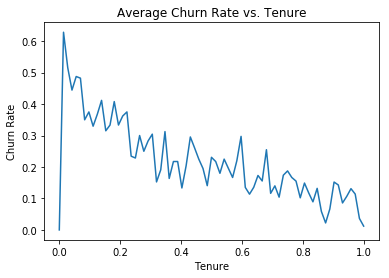

In [179]:
sns.lineplot(data=train.groupby('tenure')['churn_encoded'].mean())
plt.xlabel('Tenure')
plt.ylabel('Churn Rate')
plt.title('Average Churn Rate vs. Tenure')

#### Are there features that indicate a higher propensity to churn? like type of internet service, type of phone service, online security and backup, senior citizens, paying more than x% of customers with the same services, etc.?

The overall churn rate is 27%. Senior citizens churn at a rate of 44%. Month to month customers churn at a rate of 43%. Users of fiber optic churn at a rate of 42%, and of those with fiber, majority of the churning happens with customers who don't have utilize 'security' options. 

#### Is there a price threshold for specific services where the likelihood of churn increases once price for those services goes past that point? If so, what is that point for what service(s)?

##### Phone only

In [180]:
train.groupby('internet_service_type')['internet_service_type'].count()

internet_service_type
DSL            1703
Fiber optic    2157
None           1070
Name: internet_service_type, dtype: int64

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


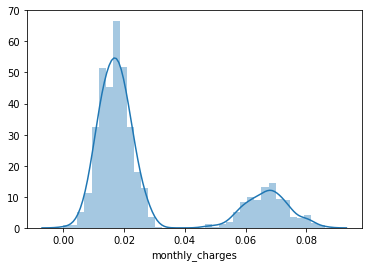

In [181]:
sns.distplot(train.loc[train.internet_service_type_encode == 2].monthly_charges)


In [104]:
bins = [i for i in range(18, 28)]
all_phone_binned = pd.cut(train.loc[train.internet_service_type_encode == 2].monthly_charges, bins)
a = pd.DataFrame(all_phone_binned)

In [121]:
a['churn'] = train.loc[train.internet_service_type_encode == 2].churn_encoded

In [122]:
a.monthly_charges.iloc[0]

Interval(19, 20, closed='right')

In [123]:
a.groupby('monthly_charges')['churn'].mean()

monthly_charges
(18, 19]    0.090909
(19, 20]    0.088283
(20, 21]    0.086614
(21, 22]    0.050000
(22, 23]    0.000000
(23, 24]    0.035714
(24, 25]    0.032895
(25, 26]    0.028986
(26, 27]    0.000000
Name: churn, dtype: float64

In [116]:
a.head()

,monthly_charges,churn
5517,"(19, 20]",0
5518,"(20, 21]",1
5519,"(19, 20]",0
5520,"(19, 20]",1
5521,"(19, 20]",0


##### DSL only

In [119]:
train.loc[(train.internet_service_type == 'DSL') & (train.phone_service == 'No')].describe()

,senior_citizen,tenure,internet_service_type_id,contract_type_id,payment_type_id,monthly_charges,total_charges,family_plan,churn_encoded,tenure_year,...,streaming_tv_encode,tech_support_encode,device_protection_encode,online_backup_encode,online_security_encode,multiple_lines_encode,phone_service_encode,dependents_encode,gender_encode,partner_encode
count,682.000000,682.000000,682.0,682.000000,682.000000,682.000000,682.000000,682.0,682.000000,682.000000,...,682.000000,682.000000,682.000000,682.000000,682.000000,682.0,682.0,682.000000,682.000000,682.000000
mean,0.152493,31.737537,1.0,1.684751,2.329912,42.028592,1496.033651,0.0,0.249267,2.644384,...,0.835777,0.847507,0.894428,0.841642,0.829912,1.0,0.0,0.302053,0.514663,0.456012
std,0.359762,24.233204,0.0,0.830071,1.156460,11.419585,1341.690864,0.0,0.432906,2.019741,...,0.987147,0.989030,0.995142,0.988106,0.986152,0.0,0.0,0.459485,0.500152,0.498427
min,0.000000,0.000000,1.0,1.000000,1.000000,23.450000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000
25%,0.000000,8.000000,1.0,1.000000,1.000000,33.600000,298.512500,0.0,0.000000,0.670000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000
50%,0.000000,29.000000,1.0,1.000000,2.000000,40.575000,1149.025000,0.0,0.000000,2.420000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,1.000000,0.000000
75%,0.000000,53.000000,1.0,2.000000,3.000000,50.737500,2458.587500,0.0,0.000000,4.420000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.0,0.0,1.000000,1.000000,1.000000
max,1.000000,72.000000,1.0,3.000000,4.000000,67.200000,4919.700000,0.0,1.000000,6.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.0,0.0,1.000000,1.000000,1.000000


In [124]:
bins = [i for i in range(23, 68, 5)]
all_phone_binned = pd.cut(train.loc[(train.internet_service_type == 'DSL') & (train.phone_service == 'No')].monthly_charges, bins)
d = pd.DataFrame(all_phone_binned)
d['churn'] = train.loc[(train.internet_service_type == 'DSL') & (train.phone_service == 'No')].churn_encoded

In [125]:
d.groupby('monthly_charges')['churn'].mean()

monthly_charges
(23, 28]    0.437500
(28, 33]    0.333333
(33, 38]    0.276190
(38, 43]    0.255102
(43, 48]    0.229885
(48, 53]    0.209302
(53, 58]    0.149254
(58, 63]    0.100000
Name: churn, dtype: float64

#### Fiber

In [137]:
train.loc[(train.internet_service_type == 'Fiber optic') & (train.multiple_lines == 'No')].describe()


,senior_citizen,tenure,internet_service_type_id,contract_type_id,payment_type_id,monthly_charges,total_charges,family_plan,churn_encoded,tenure_year,...,streaming_tv_encode,tech_support_encode,device_protection_encode,online_backup_encode,online_security_encode,multiple_lines_encode,phone_service_encode,dependents_encode,gender_encode,partner_encode
count,1158.000000,1158.000000,1158.0,1158.000000,1158.000000,1158.000000,1158.000000,1158.0,1158.000000,1158.000000,...,1158.000000,1158.000000,1158.000000,1158.000000,1158.000000,1158.0,1158.0,1158.000000,1158.000000,1158.000000
mean,0.227116,21.389465,2.0,1.280656,1.932642,84.580570,1933.581822,0.0,0.457686,1.782133,...,0.905009,0.466321,0.677029,0.652850,0.438687,0.0,1.0,0.203800,0.491364,0.392919
std,0.419149,20.863663,0.0,0.580426,1.162935,11.307584,2026.517061,0.0,0.498422,1.739024,...,0.995908,0.846053,0.946818,0.938215,0.827961,0.0,0.0,0.402996,0.500141,0.488610
min,0.000000,1.000000,2.0,1.000000,1.000000,67.750000,68.500000,0.0,0.000000,0.080000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000
25%,0.000000,3.000000,2.0,1.000000,1.000000,74.612500,261.087500,0.0,0.000000,0.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000
50%,0.000000,14.000000,2.0,1.000000,1.000000,83.825000,1150.600000,0.0,0.000000,1.170000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000
75%,0.000000,34.000000,2.0,1.000000,3.000000,94.187500,3026.700000,0.0,1.000000,2.830000,...,2.000000,0.000000,2.000000,2.000000,0.000000,0.0,1.0,0.000000,1.000000,1.000000
max,1.000000,72.000000,2.0,3.000000,4.000000,112.200000,8033.100000,0.0,1.000000,6.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,0.0,1.0,1.000000,1.000000,1.000000


In [138]:
bins = [i for i in range(67, 113, 5)]
all_phone_binned = pd.cut(train.loc[(train.internet_service_type == 'Fiber optic') & (train.multiple_lines == 'No')].monthly_charges, bins)
f = pd.DataFrame(all_phone_binned)
f['churn'] = train.loc[(train.internet_service_type == 'Fiber optic') & (train.multiple_lines == 'No')].churn_encoded


In [140]:
f.groupby('monthly_charges')['churn'].mean()

monthly_charges
(67, 72]      0.594828
(72, 77]      0.455882
(77, 82]      0.571429
(82, 87]      0.432000
(87, 92]      0.424837
(92, 97]      0.392857
(97, 102]     0.282828
(102, 107]    0.258065
(107, 112]    0.190476
Name: churn, dtype: float64

There doesn't seem to be a price threshold that causes people to churn. In fact, most people churn at lower prices, meaning that price isn't a big factor. It does make sense though since lower prices are found at earlier tenures, meaning that people churn early. Those churning early are those on MtM.

#### If we looked at churn rate for month-to-month customers after the 12th month and that of 1-year contract customers after the 12th month, are those rates comparable?

In [145]:
print(f'Churn rate for MtM at 12 months: {train.loc[(train.contract_type_id == 1) & (train.tenure == 12)].churn_encoded.mean()}')
print(f'Churn rate for 1-year at 12 months: {train.loc[(train.contract_type_id == 2) & (train.tenure == 12)].churn_encoded.mean()}')

Churn rate for MtM at 12 months: 0.38372093023255816
Churn rate for 1-year at 12 months: 0.22727272727272727


After a year, customers on 1 year contracts churn 23% of the time, while MtM customers churn 38% of the time. Even after spending equal amount of time with our services, MtM customers still churn more.

#### Controlling for services (phone_id, internet_service_type_id, online_security_backup, device_protection, tech_support, and contract_type_id), is the mean monthly_charges of those who have churned significantly different from that of those who have not churned? (Use a t-test to answer this.)

#### How much of monthly_charges can be explained by internet_service_type? (hint: correlation test). State your hypotheses and your conclusion clearly.

Being that fiber is likely to cost more than DSL, my hypothesis is that monthly_charges and internet type are positively correlated.

In [146]:
train[['monthly_charges', 'internet_service_type_id']].corr()

,monthly_charges,internet_service_type_id
monthly_charges,1.00000,-0.32326
internet_service_type_id,-0.32326,1.00000


In [147]:
train.groupby('internet_service_type')['monthly_charges'].mean()

internet_service_type
DSL            58.102169
Fiber optic    91.500129
None           21.079194
Name: monthly_charges, dtype: float64

#### The mean monthly charges don't match the correlation. This is due to the strange encoding convention used in the data. We will make a new column where 0 is No internet, 1 is DSL, and 2 is Fiber.

In [150]:
train[['internet_service_type_id', 'internet_service_type']].sample(10)

,internet_service_type_id,internet_service_type
5195,2,Fiber optic
5744,3,None
5460,2,Fiber optic
300,1,DSL
6004,3,None
4598,2,Fiber optic
5672,3,None
4261,2,Fiber optic
5589,3,None
1376,1,DSL


In [155]:
train['better_internet_id'] = train.internet_service_type

In [156]:
train.loc[train.better_internet_id == 'Fiber optic', 'better_internet_id'] = 2
train.loc[train.better_internet_id == 'DSL', 'better_internet_id'] = 1
train.loc[train.better_internet_id == 'None', 'better_internet_id'] = 0
train[['better_internet_id', 'internet_service_type']].sample(10)

,better_internet_id,internet_service_type
1557,1,DSL
1200,1,DSL
1763,1,DSL
1094,1,DSL
5346,2,Fiber optic
5664,0,None
4126,2,Fiber optic
5270,2,Fiber optic
2158,1,DSL
3594,2,Fiber optic


In [157]:
train[['better_internet_id', 'monthly_charges']].corr()

,better_internet_id,monthly_charges
better_internet_id,1.000000,0.905491
monthly_charges,0.905491,1.000000


#### Much better. The correlation matches our hypothesis as well as the means we calculated. As internet services are upgraded, monthly charges increase.

#### How much of monthly_charges can be explained by internet_service_type + phone service type (0, 1, or multiple lines). State your hypotheses and your conclusion clearly.

I believe that there will be a strong positive correlation between internet + phone service and monthly charges. These two variables are the main costs for customers, if not the only costs.

In [158]:
train['internet_and_phone'] = train.better_internet_id + train.phone_id
train.internet_and_phone.describe()

count    7043.000000
mean        2.547920
std         1.152438
min         1.000000
25%         1.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: internet_and_phone, dtype: float64

In [159]:
train[['internet_and_phone', 'monthly_charges']].corr()

,internet_and_phone,monthly_charges
internet_and_phone,1.000000,0.885647
monthly_charges,0.885647,1.000000


The correlation matches our hypothesis, as a customer purchases more services or upgrades their services, monthly charges will increase. However, internet service by itself had a better correlation with monthly charges.

#### Create visualizations exploring the interactions of variables (independent with independent and independent with dependent).

In [177]:
pd.crosstab(train.internet_service_type, train.senior_citizen, margins=True)

senior_citizen,0,1,All
internet_service_type,,,
DSL,1512,191,1703
Fiber optic,1586,571,2157
None,1028,42,1070
All,4126,804,4930


In [170]:
df_encoded.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract_type_id',
       'paperless_billing', 'payment_type_id', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type', 'family_plan', 'churn_encoded', 'tenure_year',
       'in_tenure_year', 'household', 'phone_id', 'streaming_services',
       'online_security_backup', 'payment_type_encode',
       'internet_service_type_encode', 'contract_type_encode', 'churn_encode',
       'paperless_billing_encode', 'streaming_movies_encode',
       'streaming_tv_encode', 'tech_support_encode',
       'device_protection_encode', 'online_backup_encode',
       'online_security_encode', 'multiple_lines_encode',
       'phone_service_encode', 'dependents_encode', 

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a4d12c048>,
      dtype=object)

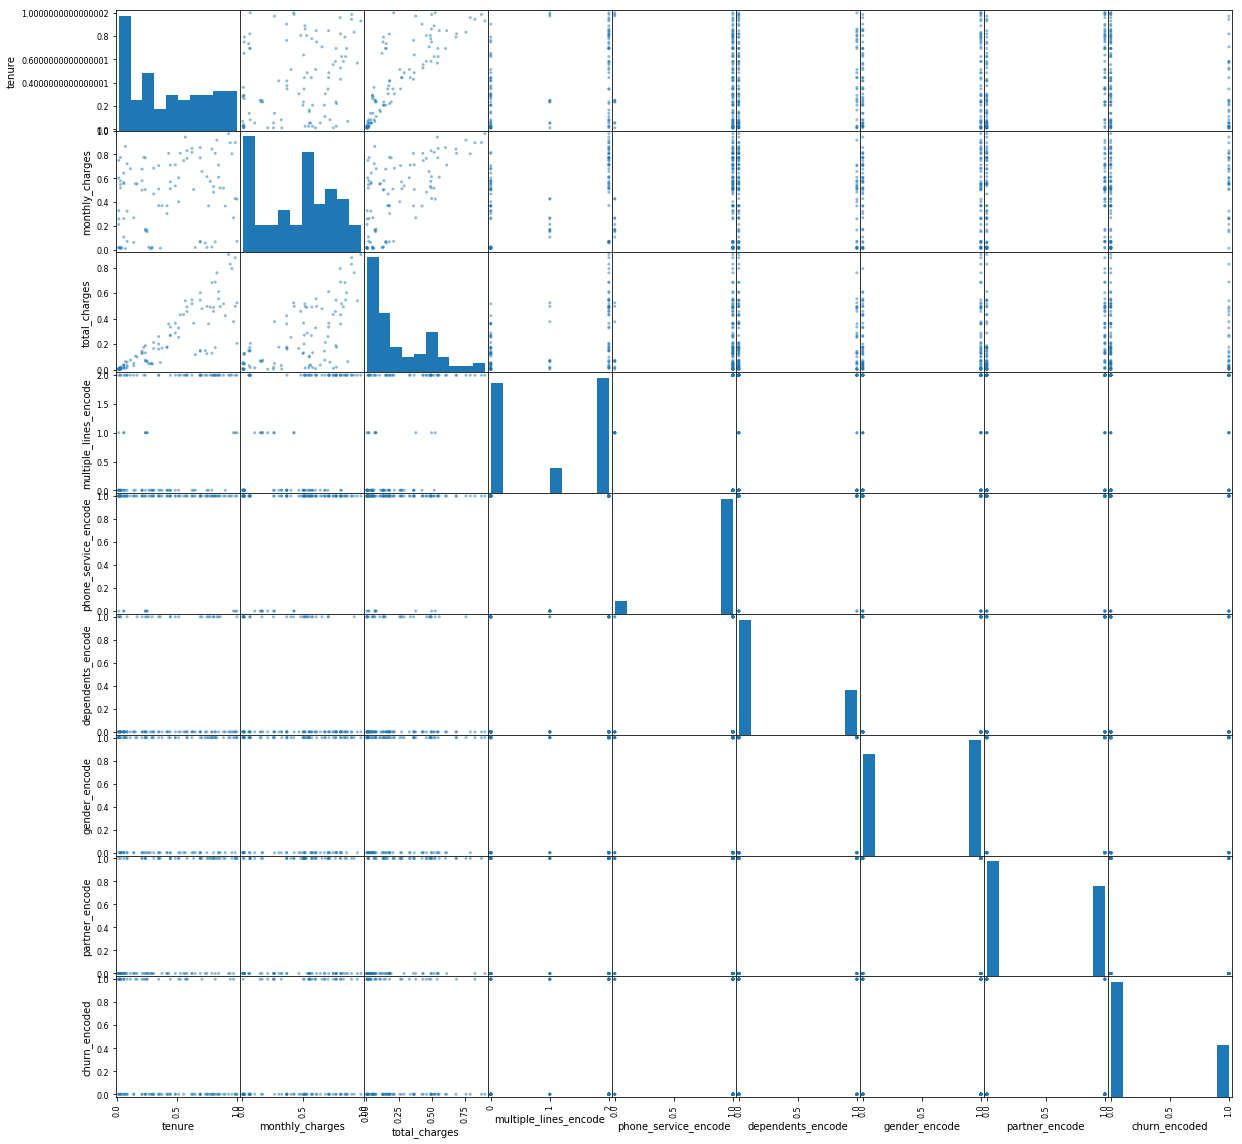

In [176]:
pd.scatter_matrix(train[['tenure', 'monthly_charges', 'total_charges', 
#                               'better_internet_id', 'online_security_encode','online_backup_encode', 
#                               'device_protection_encode', 'tech_support_encode', 'streaming_tv_encode', 
#                               'streaming_movies_encode', 'paperless_billing_encode', 
                              'multiple_lines_encode', 'phone_service_encode', 'dependents_encode', 
                              'gender_encode', 'partner_encode', 'churn_encoded']].sample(100), figsize=(20,20))

In [ ]:
sns.barplot()

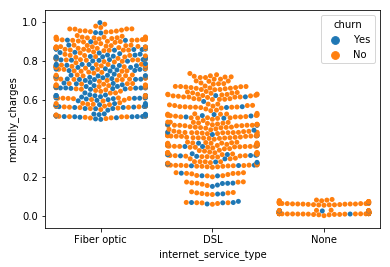

In [178]:
sns.swarmplot(data=train.sample(1000), x='internet_service_type', y='monthly_charges', hue='churn')

In [ ]:
sns.pairplot(df_encoded)

#### What can you say about each variable's relationship to churn, based on your initial exploration? If there appears to be some sort of interaction or correlation, assume there is no causal relationship and brainstorm (and document) ideas on reasons there could be correlation.

In [ ]:
df_encoded.columns

In [ ]:
def peekatdata(df):
    print('First five rows of the dataframe:')
    head_df = df.head()
    print(head_df)
    print('\n')
    print('Last five rows of the dataframe:')
    tail_df = df.tail()
    print(tail_df)
    print('\n')
    print('Shape of the dataframe:')
    shape_tuple = df.shape
    print(shape_tuple)
    print('\n')
    print('Describe dataframe:')
    describe_df = df.describe()
    print(describe_df)
    print('\n')
    print('Data types of each column:')
    print(df.dtypes)
    print('\n')
    print('Non-nulls in each column:')
    print(df.info())
    print('\n')
    print('Memory usage:')
    print(df.memory_usage) # Currently not working
    return head_df, tail_df

In [ ]:
peekatdata(df)

In [ ]:
head_df